# 3. Matplotlib

While *seaborn* generates good-looking figures out of the box, most of the time we need to introduce some adjustments. You saw already in the previous chapters that we were relabeling axes and adjusting their range or ticks. In order to do all of this customization, we rely on calling `matplotlib` functions directly. Here, we will review some basic concepts of matplotlib figures and see how to adjust their certain elements to our liking.

Two most important concepts to be aware of when using `matplotlib` are the **figure** and **axes** objects:

 - **axes** (also referred to as subplots): the area where we plot the data; has an x- and y-axis which contain ticks, tick locations, labels and other elements
 - **figure**: the overall window/page where everything is drawn on; can contain multiple axes (subplots) organized in a form of a grid
 
**Before you begin**: Be sure to check out the official matplotlib cheat sheet (available [here](https://matplotlib.org/cheatsheets/cheatsheets.pdf)) - it outlines all of the most useful functionalities discussed below and more!

###### Set up

In [1]:
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

## 3.1 Creating figures and subplots

Let's see now how to create a figure and its axes. Note: the following examples don't have any data shown on the (sub)plots - this is to only show you how to create and refer to figures with one or more axes.

Documentation you might want to check for further information:
 - [tutorial on creating multiple sublots](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)

###### 3.1.1 One Subplot

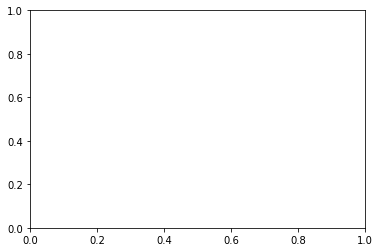

In [2]:
fig, ax = plt.subplots(nrows=1, ncols=1)

###### 3.1.2 Many Subplots - Horizontal Layout

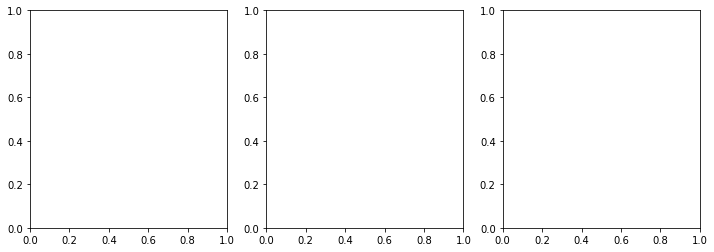

In [3]:
# we can adjust size of the figure by passing the figsize parameter
# which is a tuple of (width, height)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

###### 3.1.3 Multiple Subplots - Grid Layout

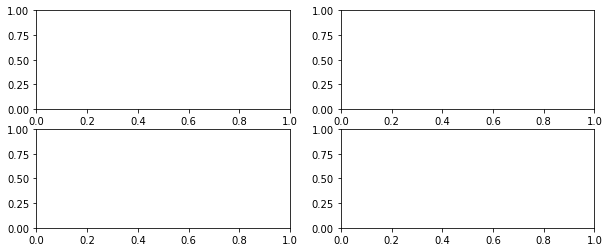

In [4]:
# instead of specifying exact width and height, we can also request 
# a specific aspect ratio

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=plt.figaspect(0.4))

###### 3.1.4 Gridspec

Sometimes we need to have a grid of plots where some subplots should span multiple rows or columns. In this case, a Gridspec is helpful. The below code shows how we can do this.

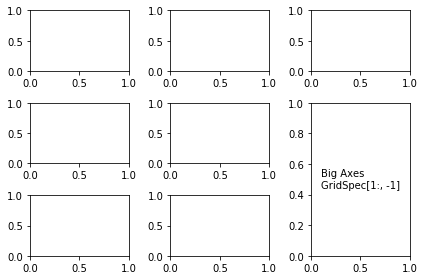

In [111]:
# vertical alignment of gridspace
fig, axs = plt.subplots(ncols=3, nrows=3)
gs = axs[1, 2].get_gridspec() # here the gridspec is object is created
# remove the underlying axes where the big axis will be placed
for ax in axs[1:, -1]:
    ax.remove()
axbig = fig.add_subplot(gs[1:, -1]) # here we add the big subplot
axbig.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
               xycoords='axes fraction', va='center')

fig.tight_layout()

plt.show()

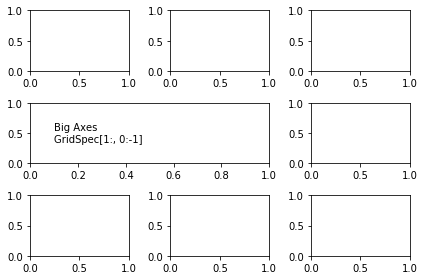

In [112]:
# horizontal alignment of gridspace
fig, axs = plt.subplots(ncols=3, nrows=3)
gs = axs[1, 2].get_gridspec() # here the gridspec is object is created
# remove the underlying axes where the big axis will be placed
for ax in axs[1, 0:-1]:
    ax.remove()
axbig = fig.add_subplot(gs[1, 0:-1]) # here we add the big subplot
axbig.annotate('Big Axes \nGridSpec[1:, 0:-1]', (0.1, 0.5),
               xycoords='axes fraction', va='center')

fig.tight_layout()

plt.show()

## 3.2 Adding data to specific subplots

When you use seaborn, it will automatically create axes and figures for you so you don't need to do any of the above. However, when you want to have better control over your plots you may want to first create your own figure with the desired properties and then place specific plots in its axes.

In [5]:
# example data
x = np.arange(0.1, 4, 0.1)
df = pd.DataFrame({
    'x': x,
    'y1': np.exp(-1.0 * x),
    'y2': np.exp(-0.5 * x)
})

###### 3.2.1 A single plot

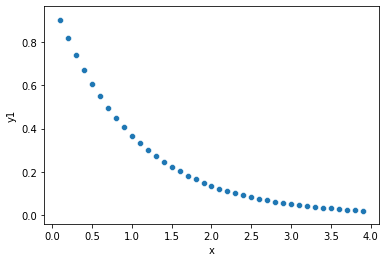

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)

# when only one subplot is present, "ax" can be passed directly 
# to seaborn plotting functions
sns.scatterplot(data=df, x='x', y='y1', ax=ax);

###### 3.2.2 Multiple plots

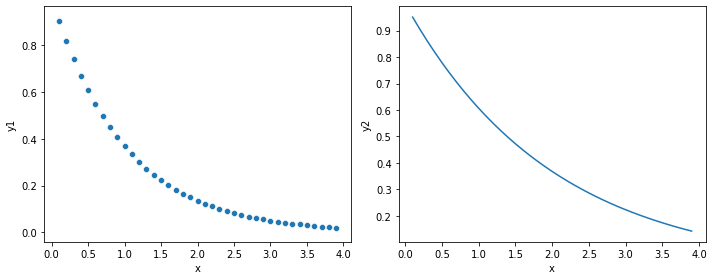

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# when plotting more than one subplot, "axes" becomes a numpy array with
# a shape (nrows, ncols) -> you need to select which subplot you want to use
# and pass this one to the plotting function
sns.scatterplot(data=df, x='x', y='y1', ax=axes[0])
sns.lineplot(data=df, x='x', y='y2', ax=axes[1])

fig.tight_layout()

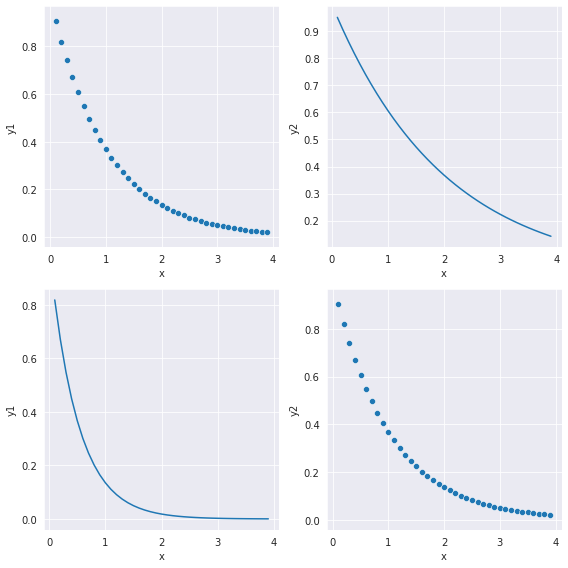

In [8]:
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
    
    # just like above but the "axes" array is now two-dimensional
    sns.scatterplot(data=df, x='x', y='y1', ax=axes[0, 0])
    sns.lineplot(data=df, x='x', y='y2', ax=axes[0, 1])
    sns.lineplot(x=df['x'], y=df['y1']**2, ax=axes[1, 0])
    sns.scatterplot(x=df['x'], y=df['y2']**2, ax=axes[1, 1])

fig.tight_layout()

## 3.3 Modifying elements of a plot

As you could see so far, we often need to adjust certain elements of a plot. Most of the attributes that we are usually interested in can be modified directly on the *Axes* object (the one that you passed to or received from a *seaborn* plotting function). Adjustments that concern e.g. how subplots relate to one another (like spacing between them) or other ones that have to do with the figure itself (like a figure title) can be set on the *Figure* object directly.

###### 3.3.1 Axes' labels and title

Documentation you might want to check for further information:
 - [axes labels](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html)
 - [axes title](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html)

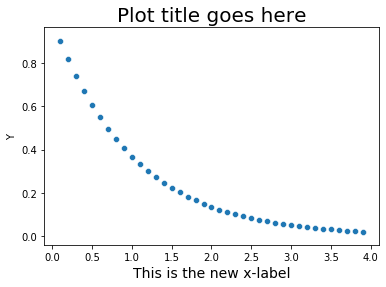

In [9]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='x', y='y1', ax=ax)

# axes labels
ax.set_xlabel('This is the new x-label', fontsize=14)
ax.set_ylabel('Y')

# subplot title
ax.set_title('Plot title goes here', fontsize=20);

###### 3.3.2 Axes' ranges, ticks and tick labels 

Documentation you might want to check for further information:
 - [axes range](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html)
 - [ticks](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html)
 - [tick labels](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html)
 - [other tick parameters](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)

Text(0.5, 1, 'Rotated Labels')

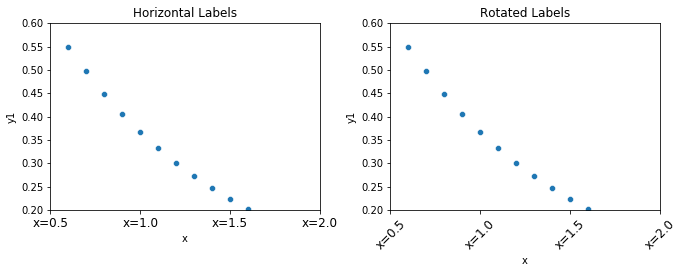

In [51]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 4))
plt.tight_layout(pad = 4.0) #adding space between subplots
sns.scatterplot(data=df, x='x', y='y1', ax=ax[0]) #labels aligned vertically
sns.scatterplot(data=df, x='x', y='y1', ax=ax[1]) #labels aligned horizontally

# axes ranges
ax[0].set_xlim((0.5, 2.0)) #left subplots
ax[0].set_ylim((0.2, 0.6))

ax[1].set_xlim((0.5, 2.0)) #right subplots
ax[1].set_ylim((0.2, 0.6))

# axes ticks
xticks = np.arange(0.5, 2.1, 0.5)

#left subplot
ax[0].set_xticks(xticks) # sets tick values
ax[0].tick_params(axis='x', which='major', bottom=True) # displays the actual ticks
ax[0].tick_params(axis='y', which='major', left=True)

#right subplot
ax[1].set_xticks(xticks) # sets tick values
ax[1].tick_params(axis='x', which='major', bottom=True) # displays the actual ticks
ax[1].tick_params(axis='y', which='major', left=True)

# axes tick labels
xtick_labels = [f'x={x}' for x in xticks]
ax[0].set_xticklabels(xtick_labels, rotation = 'horizontal', fontsize=12)
ax[1].set_xticklabels(xtick_labels, rotation = 45, fontsize=12)
ax[0].set_title("Horizontal Labels")
ax[1].set_title("Rotated Labels")

###### 3.3.3 Axis' scale

Documentation you might want to refer to for further information:
 - [axis scale](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xscale.html)

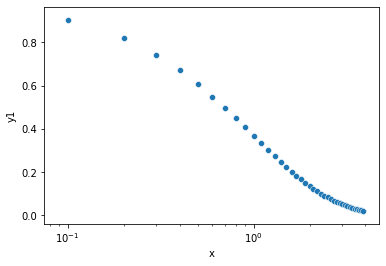

In [11]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='x', y='y1', ax=ax)

# set x-axis to logarithmic scale
ax.set_xscale('log');

###### 3.3.4 Zooming in/out in a plot

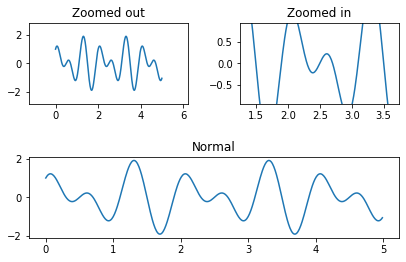

In [80]:
#define the function that will be plotted
def f(x):
    return np.sin(2*np.pi*x) + np.cos(3*np.pi*x)

x = np.arange(0.0, 5.0, 0.01)
axis1 = plt.subplot(212)
axis1.margins() # Default margin is 0.05
axis1.plot(x, f(x))
axis1.set_title('Normal')

axis2 = plt.subplot(221)
axis2.margins(0.25, 0.25) # Zoom out on both coordinates by a factor of 0.25
axis2.plot(x, f(x))
axis2.set_title('Zoomed out')

axis3 = plt.subplot(222)
axis3.margins(-0.25, -0.25)   # Zoom in on both coordinates by a factor of 0.25
axis3.plot(x, f(x))
axis3.set_title('Zoomed in')

plt.tight_layout(pad = 2.0)
plt.show()

###### 3.3.5 Color Maps

Documentation you might want to check for further information:
- [seaborn's color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
- [matplotlib's color maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

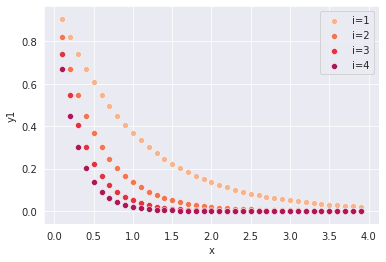

In [12]:
# we can use seaborn's built in color palettes 
# https://seaborn.pydata.org/tutorial/color_palettes.html

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots()
    
    colors = sns.color_palette("rocket")
    for i in range(1, 5):
        sns.scatterplot(x=df['x'], y=df['y1']**i, ax=ax, label=f'i={i}', color=colors[-i])

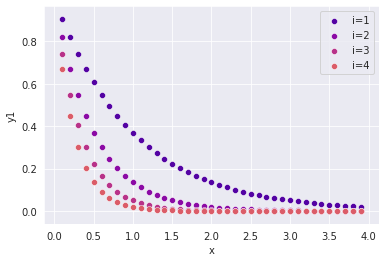

In [13]:
# alternatively, we can use matplotlib's color maps 
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

from matplotlib import cm

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots()
    
    colors = cm.get_cmap('plasma', 8).colors
    for i in range(1, 5):
        sns.scatterplot(x=df['x'], y=df['y1']**i, ax=ax, label=f'i={i}', color=colors[i])

###### 3.3.6 Legend position and title

Documentation you might want to check for further information:
- [legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

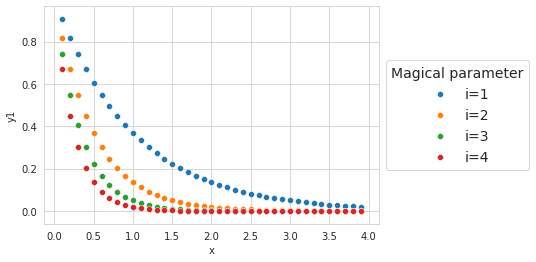

In [14]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots()
    
    for i in range(1, 5):
        sns.scatterplot(x=df['x'], y=df['y1']**i, ax=ax, label=f'i={i}')
        
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14, title_fontsize=14)
    legend = ax.get_legend()
    legend.set_title('Magical parameter')

###### 3.3.7 Figure Title

Documentation you might want to check for further information:
- [figure title](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html)

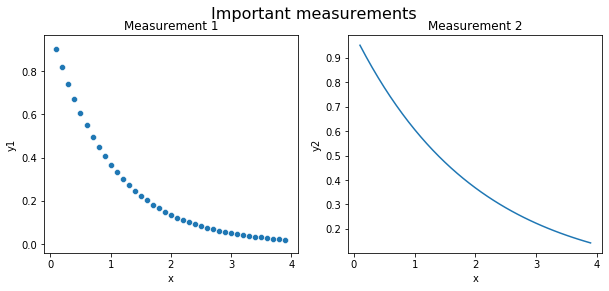

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(data=df, x='x', y='y1', ax=axes[0])
sns.lineplot(data=df, x='x', y='y2', ax=axes[1])

# we can add title to individual subplots
for i, ax in enumerate(axes):
    axes[i].set_title(f'Measurement {i+1}', fontsize=12)

# but also to the entire figure
fig.suptitle('Important measurements', fontsize=16);

###### 3.3.8 Layout of Subplots

Documentation you might want to check for further information:
- [tight layout function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html)
- [tight layout complete guide](https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py)

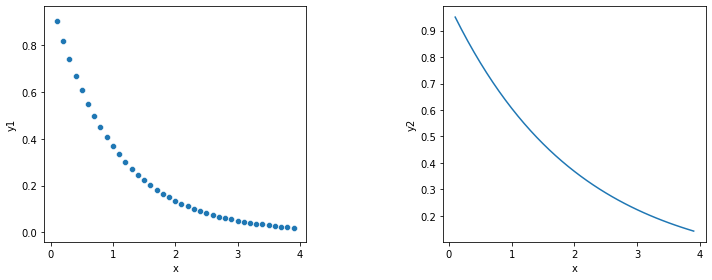

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(data=df, x='x', y='y1', ax=axes[0])
sns.lineplot(data=df, x='x', y='y2', ax=axes[1])

# we can adjust spacing between individual subplots
fig.tight_layout(w_pad=10)

###### 3.3.9 Axis label position and colorbars

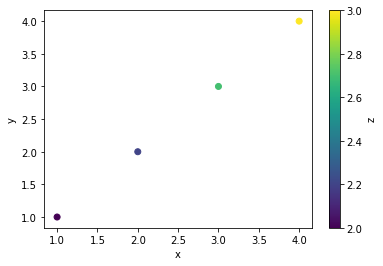

In [98]:
fig, ax = plt.subplots()

# here we create a scatterplot out of a dataset with
# two points (1,1), (2,2). The argument c
sc = ax.scatter([1, 2, 3, 4], [1, 2, 3, 4], c=[2, 2.2, 2.7, 3])
ax.set_ylabel('y')
ax.set_xlabel('x')
cbar = fig.colorbar(sc)
cbar.set_label("z")

plt.show()